#  apply함수를 사용하는 이유

> **feature engineering**

* 기존 데이터로 더 유용한 새로운 특성(feature)을 만드는 것

* 이제까지 배운 함수만으로 모든 feature engineering을 할 수 없다

* 이럴때 apply의 도움이 필요하다

>**apply**

* 함수를 적용하게 해주는 함수

* 데이터 프레임이나 시리즈에 직접 적용이 안되는 함수 (ex 파이썬 함수, 사용자 정의 함수) 들을 적용하게 해준다

In [1]:
import pandas as pd
list1 = ['mom', 'get', 'pandas', 'level']
s1 = pd.Series(list1)
s2 = pd.Series(['1', '2', '3'])
s1

0       mom
1       get
2    pandas
3     level
dtype: object

In [6]:
len('python')
print(list(map(len, list1)))

[3, 3, 6, 5]


리스트의 개별 원소에 **len** 함수를 적용하려면 **map** 함수의 도움이 필요하듯, 판다스에서도 데이터 프레임이나 시리즈에 적용되지 않는 함수를 적용하려면 **apply**의 도움이 필요하다

In [7]:
# 각 셀의 길이를 반환하는 시리즈를 만들고 싶을때
s1.apply(len)

0    3
1    3
2    6
3    5
dtype: int64

In [14]:
# s2의 자료형을 정수(int)로 변경하기
# s2.astype('int')
s2.apply(int)

0    1
1    2
2    3
dtype: int64

# 시리즈에 apply 사용하기

>pands apply

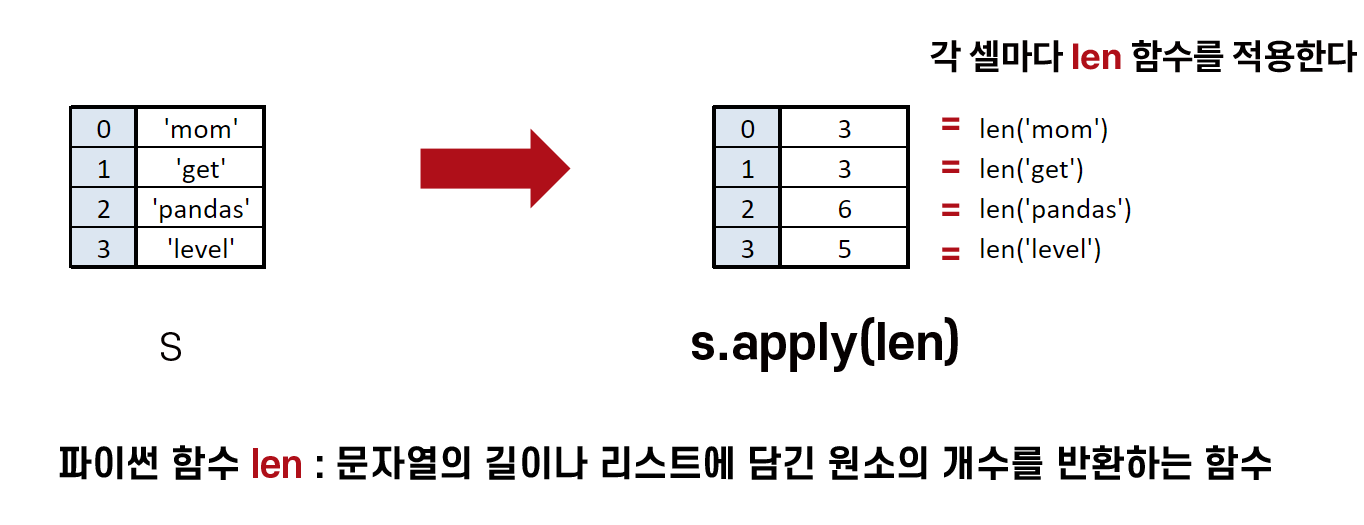

데이터 프레임이나 시리즈의 개별 요소 각각에 함수를 적용해주는 함수

데이터 프레임은 시리즈 단위로 함수를 적용하고, 시리즈는 셀단위로 함수를 적용한다


---


**func** (인수는 함수)

개별 요소에 적용할 함수를 입력하는 인자

**axis** (인수는 0 or 1 / 기본값은 0)

데이터 프레임에 apply를 적용하면 시리즈별로 함수를 적용되는데 그 때 개별 시리즈를 결정하는 축을 지정하는 인자

* 0 : 열마다 함수를 적용한다
* 1 : 행마다 함수를 적용한다

In [15]:
import pandas as pd
data = [['강승주', 'mom'], ['송중기', 'get'],
        ['권보아', 'pandas'], ['김판다', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df

이름      답안
0  강승주     mom
1  송중기     get
2  권보아  pandas
3  김판다   level

In [19]:
df['글자수'] = df['답안'].apply(len)
df

이름      답안  글자수
0  강승주     mom    3
1  송중기     get    3
2  권보아  pandas    6
3  김판다   level    5

# 사용자 정의 함수를 apply로 적용하기 (lamda)

In [20]:
import pandas as pd
data = [['강승주', 'mom'], ['송중기', 'get'],
        ['권보아', 'pandas'], ['김판다', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df['글자수'] = df['답안'].apply(len)
df

이름      답안  글자수
0  강승주     mom    3
1  송중기     get    3
2  권보아  pandas    6
3  김판다   level    5

In [22]:
# 문자열을 역순으로 뒤집는 사용자 정의 함수 만들기
x = 'get'
x[::-1]

def rev1(x):
    return x[::-1]
rev1('get')

'teg'

In [26]:
df['역순'] = df['답안'].apply(rev1)
df

이름      답안  글자수      역순
0  강승주     mom    3     mom
1  송중기     get    3     teg
2  권보아  pandas    6  sadnap
3  김판다   level    5   level

In [28]:
# lambda함수 정의하기
def rev1(x):
    return x[::-1]
print(rev1('get'))

rev2 = lambda x:x[::-1]
print(rev2('get'))

teg
teg


In [30]:
# lambda 함수는 사전에 정의하지 않고 바로 넣어 사용 가능
df['역순'] = df['답안'].apply(lambda x:x[::-1])
df

이름      답안  글자수      역순
0  강승주     mom    3     mom
1  송중기     get    3     teg
2  권보아  pandas    6  sadnap
3  김판다   level    5   level

> lambda 함수 쉽게 정의 하는 방법

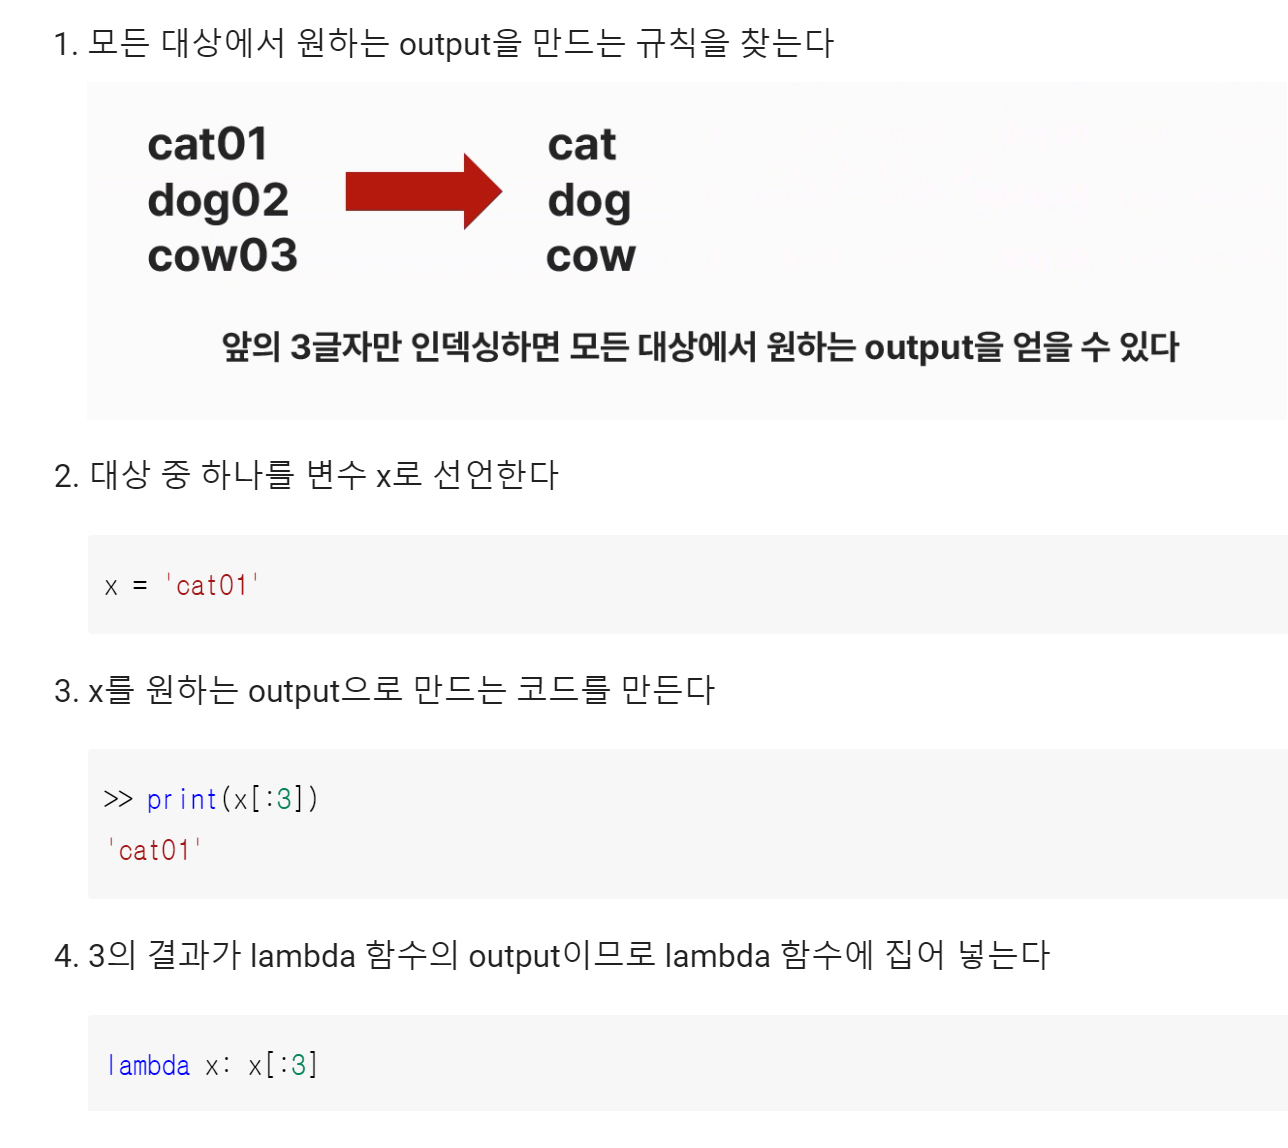

lambda 함수를 사용하는 이유:

1.   apply내에서 간편하게 한줄 코드로 함수를 정의할 수 있음
2.   대부분의 판다스 유저가 lambda함수를 사용함

# 복수의 조건문으로 필터링하기(불리언인덱싱)

여러개의 조건문으로 필터링을 하려면 조건문을 논리연산해야 한다

In [32]:
import pandas as pd
data = [['강승주', 'mom'], ['송중기', 'get'],
        ['권보아', 'pandas'], ['김판다', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df['글자수'] = df['답안'].apply(len)
df['역순'] = df['답안'].apply(lambda x: x[::-1])

df1 = pd.DataFrame([[71, 82], [91, 85], [81, 92]],
                   index=list('ABC'), columns=['국어', '영어'])

In [37]:
# 국어점수가 80점보다 높은 사람
df1['국어'] > 80

A    False
B     True
C     True
Name: 국어, dtype: bool

In [38]:
# 국어보다 영어를 잘하는 사람
df1['국어'] < df1['영어']

A     True
B    False
C     True
dtype: bool

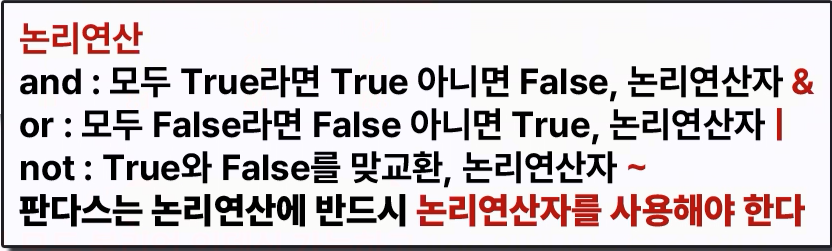

다중 요건 조건문

* 국어 점수가 80점보다 높고 국어 점수가 영어점수보다 낮은 사람

In [39]:
cond1 = df1['국어'] > 80
cond2 = df1['국어'] < df1['영어']
cond1 & cond2

A    False
B    False
C     True
dtype: bool

판다스의 논리연산에는 반드시 논리연산자를 사용해야 한다

and, or, not을 사용하면 에러가 발생한다

cond1 and cond2
>   ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()

In [40]:
# 위 조건문으로 불리언 인덱싱
df1[cond1 & cond2]

국어  영어
C  81  92

In [66]:
df

이름      답안  글자수      역순
0  강승주     mom    3     mom
1  송중기     get    3     teg
2  권보아  pandas    6  sadnap
3  김판다   level    5   level

df에서 글자수가 5이상인 회문을 답변한 사람을 찾아라

* 거꾸로 해도 원래 단어와 같은 단어나 문장을 회문이라고 한다
* 불리언 인덱싱(boolean indexing)을 사용하면 되지만 조건이 두개 즉 복수인 경우이다
* 앞서 배운 논리 연산자를 이용해 여러개의 조건문을 연산해 조건문을 만들면 해결 된다

In [71]:
cond1 = df['글자수'] >= 5
cond2 = df['답안'] == df['역순']
df[cond1 & cond2]

이름     답안  글자수     역순
3  김판다  level    5  level

>해당 파일에서 3글자의 회문인 정답을 찾고, 정답자의 소속 시도(광역단체)를 파악하라

In [72]:
import pandas as pd
pd.options.display.max_rows = 6
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/palindrome.csv'
df_ex1 = pd.read_csv(url)
df_ex1

이름                   주소    답안
0    류동영        경상북도 청도군 뒷마2길    메뉴
1    유지수        경상북도 문경시 청암3길   목욕탕
2    권민식  경기도 안양시 동안구 동편로49번길    야채
..   ...                  ...   ...
997  한성균       부산광역시 영도구 청학북로   스웨터
998  양대환         강원도 춘천시 하중도길    남북
999  이종봉       충청북도 단양군 여울목2길  해외여행

[1000 rows x 3 columns]

In [97]:
# 주소 열로 시도를 구분하는 열 만들기
df_ex1['시도'] = df_ex1['주소'].apply(lambda x:x.split(' ')[0])
df_ex1

이름                   주소    답안    역순     시도
0    류동영        경상북도 청도군 뒷마2길    메뉴    뉴메   경상북도
1    유지수        경상북도 문경시 청암3길   목욕탕   탕욕목   경상북도
2    권민식  경기도 안양시 동안구 동편로49번길    야채    채야    경기도
..   ...                  ...   ...   ...    ...
997  한성균       부산광역시 영도구 청학북로   스웨터   터웨스  부산광역시
998  양대환         강원도 춘천시 하중도길    남북    북남    강원도
999  이종봉       충청북도 단양군 여울목2길  해외여행  행여외해   충청북도

[1000 rows x 5 columns]

In [99]:
#  불리언 인덱싱의 조건문2. 답안이 회문이다
cond2 = df_ex1['답안'].apply(lambda x: x[::-1]) == df_ex1['답안']
cond2

0      False
1      False
2      False
       ...  
997    False
998    False
999    False
Name: 답안, Length: 1000, dtype: bool

In [100]:
df_ex1[cond1 & cond2]

이름                    주소   답안   역순     시도
35   강승주     서울특별시 용산구 독서당로29길  기러기  기러기  서울특별시
41   백서하   인천광역시 강화군 교동북로169번길  토마토  토마토  인천광역시
57   오우진     서울특별시 노원구 동일로193길  스위스  스위스  서울특별시
617  정성빈  경기도 성남시 분당구 발이봉로11번길  인도인  인도인    경기도
917  차용석      강원도 횡성군 수남로108번길  별똥별  별똥별    강원도

In [101]:
# 시도를 집계
df_ex1.loc[cond1 & cond2, '시도'].value_counts()

시도
서울특별시    2
인천광역시    1
경기도      1
강원도      1
Name: count, dtype: int64

# 문자열 다루기

우리는 문자열을 다루는 판다스 함수를 아직 알지 못해서 apply 함수로 파이썬의 문자열 함수를 적용했다

판다스도 문자열을 다루는 함수들이 있다

> 판다스 문자열 다루는 함수들의 특징

* str 접근자를 사용한다
* 시리즈에만 적용된다
* 대체로 기본값으로 정규표현식을 사용할 수 있다

In [160]:
import pandas as pd
data = [['mom', 'cat01', 'cat-01', '   cat', 'cat01'],
        ['get', 'dog02', 'dog-01', '  dog', '01cat'],
        ['pandas', 'cow01', 'rabbit-01', ' cow', 'dog01'],
        ['level', 'cow02', 'dog-02',  'cow', 'cow01']]
df = pd.DataFrame(data, columns=list('ABCDE'))
df

A      B          C       D      E
0     mom  cat01     cat-01     cat  cat01
1     get  dog02     dog-01     dog  01cat
2  pandas  cow01  rabbit-01     cow  dog01
3   level  cow02     dog-02     cow  cow01

In [161]:
# A열의 문자열의 길이
print(df['A'].apply(len))
print('\n')
print(df['A'].str.len())

0    3
1    3
2    6
3    5
Name: A, dtype: int64


0    3
1    3
2    6
3    5
Name: A, dtype: int64


In [162]:
# B열에서 각 셀마다 앞의 세글자만 슬라이싱
print(df['B'].apply(lambda x: x[:3]))
print('\n')
print(df['B'].str[:3])

0    cat
1    dog
2    cow
3    cow
Name: B, dtype: object


0    cat
1    dog
2    cow
3    cow
Name: B, dtype: object


In [163]:
# C열에서 각 셀마다 - 앞 부분을 가져오기
print(df['C'].apply(lambda x: x.split('-')[0]))
print('\n')
print(df['C'].str.split('-').str[0])

0       cat
1       dog
2    rabbit
3       dog
Name: C, dtype: object


0       cat
1       dog
2    rabbit
3       dog
Name: C, dtype: object


In [164]:
# 열에서 각 셀마다 cat 포함여부를 bool로 만들기
print(df['D'].apply(lambda x : 'cat' in x))
print('\n')
print(df['D'].str.contains('cat'))

0     True
1    False
2    False
3    False
Name: D, dtype: bool


0     True
1    False
2    False
3    False
Name: D, dtype: bool


In [165]:
# 열에서 각 셀마다 cat 또는 dog 포함여부를 bool로 만들기
print(df['D'].apply(lambda x : 'cat' in x or 'dog' in x))
print('\n')
print(df['D'].str.contains(r'cat|dog'))

0     True
1     True
2    False
3    False
Name: D, dtype: bool


0     True
1     True
2    False
3    False
Name: D, dtype: bool


In [166]:
# E열에서 'cat'으로 시작여부 True or False로 리턴 (정규 표현식)
df['E'].str.contains(r'^cat')

0     True
1    False
2    False
3    False
Name: E, dtype: bool

In [167]:
# E열에서 'cat'으로 종료여부 True or False로 리턴 (정규 표현식)
df['E'].str.contains(r'cat$')

0    False
1     True
2    False
3    False
Name: E, dtype: bool

In [168]:
# E열에서 'cat'이 있으면 추출하기
df['E'].str.extract('(cat)')

0
0  cat
1  cat
2  NaN
3  NaN

In [169]:
# E열에서 'cat' 또는 'dog' 추출하고 없다면 NaN을 반환
df['E'].str.extract(r'(cat|dog)')

0
0  cat
1  cat
2  dog
3  NaN

# 숫자 자료형으로 바꾸기 (to_numeric)



```
pd.to_numeric(arg, errors='raise', downcast=None)
```

>시리즈를 숫자형 자료형으로 변환하는 함수.

(errors='coerce') : 변환할 수 없는 대상은 NaN 으로 변환한다.

**arg** (인수는 scalar 혹은 1차원 배열)

변환할 인수

<br/>
<br/>

**errors** ('ignore', 'raise', 'coerce' /기본값은 'raise')

* 'raise': 변환할 수 없는 객체를 만나면 에러를 일으킨다
* 'coerce': 변환할 수 없는 객체를 만나면 해당 부분만 NaN으로 바꾸고 변환을 수행한다. 이 함수를 사용하는 주요 이유이다.
* 'ignore': 변환할 수 없는 객체를 만나면 모두 변환하지 않고 그냥 input를 반환한다.

<br/>
<br/>
<br/>

**downcast** (str/기본값은 None)

'integer', 'singed', 'unsigned', or 'float'

데이터의 범위를 줄여 메모리를 절약하는데 사용되는 인자



In [136]:
import pandas as pd
s1 = pd.Series(['87', '70', '98', '-'])
s1

0    87
1    70
2    98
3     -
dtype: object

s1의 자료형을 정수로 바꾸려고 astype을 사용하면 에러가 발생한다

`s1.astype('int')`
>ValueError: invalid literal for int() with base 10: '-'

* astype은 숫자로 바꿀 수 없는 문자열이 끼어있는 시리즈를 숫자로 바꿀 수 없다

* 이때는 pd.to_numeric 함수를 사용해야 한다

In [138]:
pd.to_numeric(s1, errors='coerce')

0    87.0
1    70.0
2    98.0
3     NaN
dtype: float64

In [139]:
# errors='ignore'는 바꿀 수 없으면 전체를 바꾸지 않고 그대로 돌려준다
pd.to_numeric(s1, errors='ignore')

<ipython-input-139-dd8cec80ccd6>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pd.to_numeric(s1, errors='ignore')


0    87
1    70
2    98
3     -
dtype: object

# 데이터 프레임에 apply 사용하기

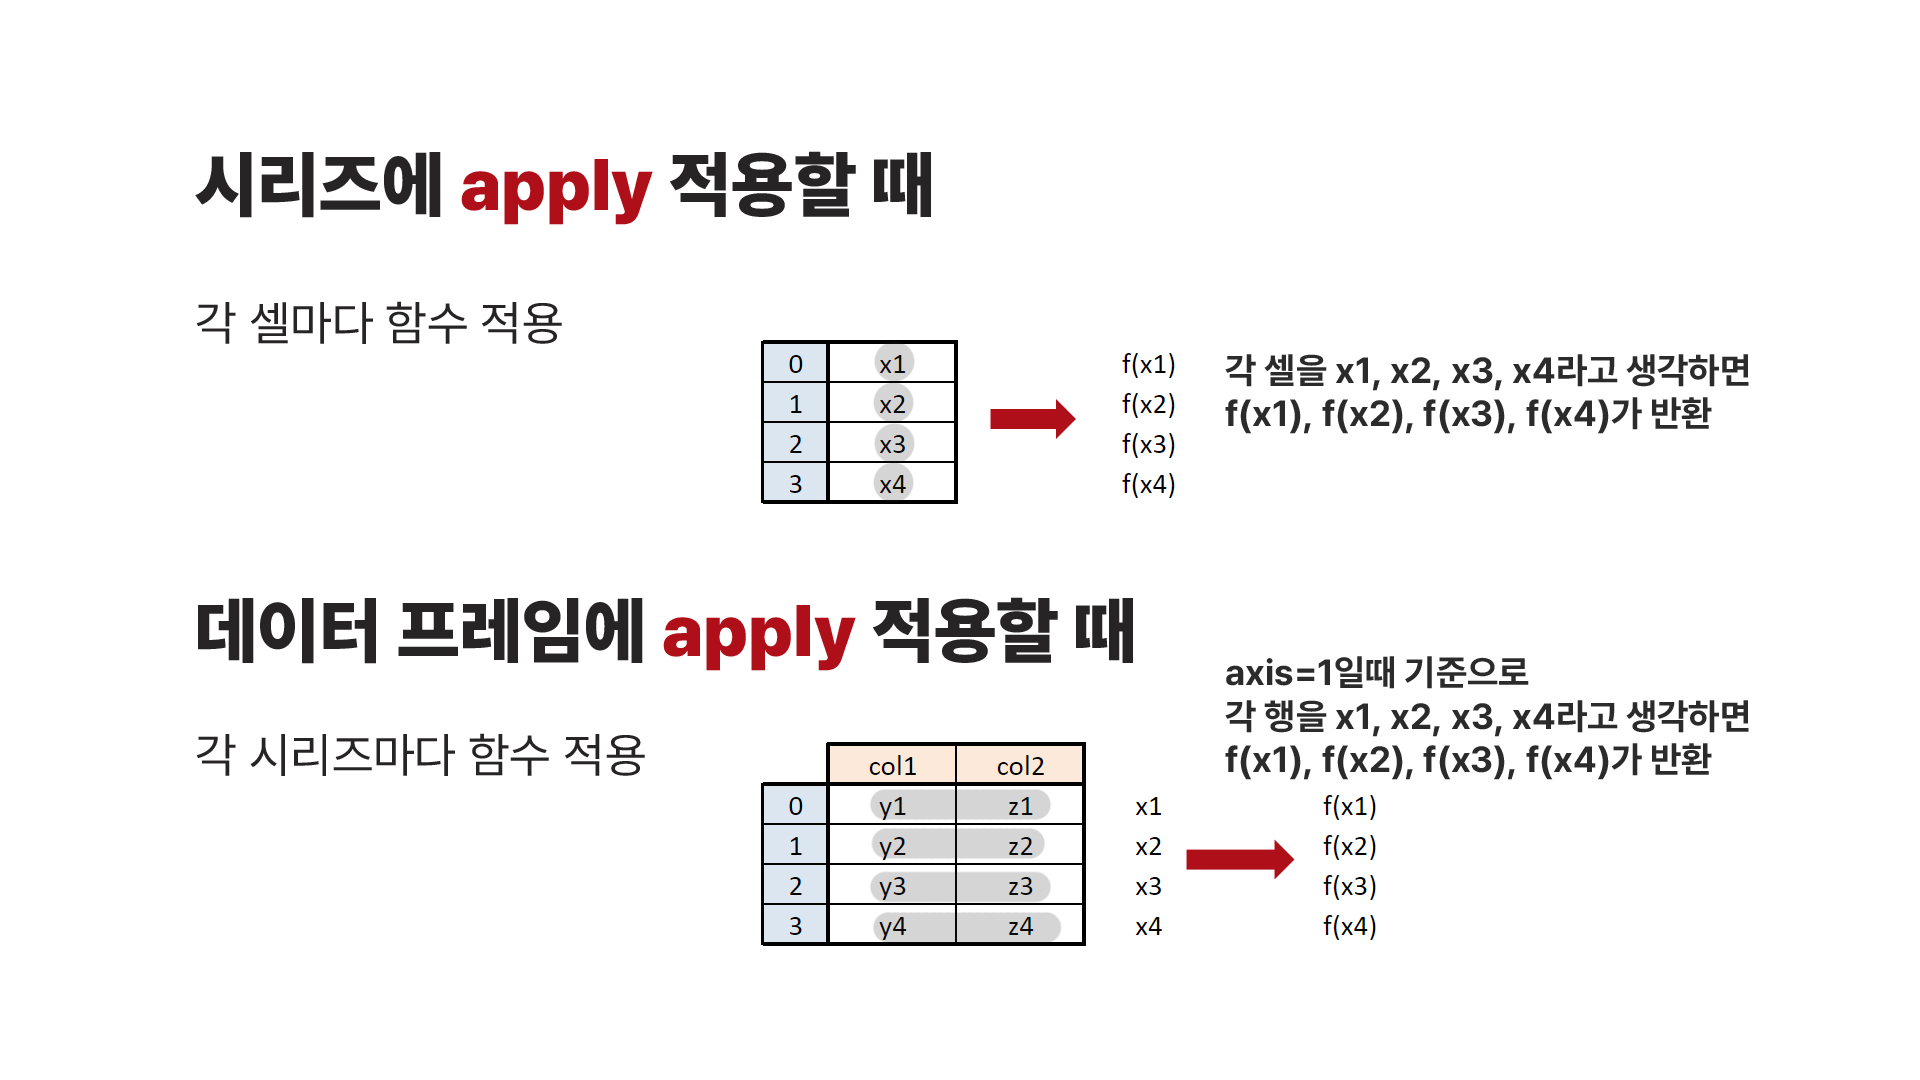

> s1을 숫자형 자료형으로 바꾸어라

* astype으로는 '-'을 숫자로 바꿀 수 없기때문에 불가능하다
* pd.to_numeric 함수를 사용하면 숫자로 바꿀 수 없는 값은 NaN으로 바꿀 수 있다(errors='coerce')
* pd.to_numeric 함수는 시리즈에만 사용가능한 함수이다 (데이터프레임에는 불가)

In [141]:
import pandas as pd
s1 = pd.Series(['87', '70', '98', '-'])
data1 = [['87', '-', '70'], ['70', '72', '73'],
         ['98', '76', '-'], ['-', '77', '95']]
data2 = [[87, 99, 70], [70, 72, 73], [98, 76, 80], [93, 77, 95]]
df1 = pd.DataFrame(data1, index=list('ABCD'), columns=['국어', '영어', '수학'])
df2 = pd.DataFrame(data2, index=list('ABCD'), columns=['국어', '영어', '수학'])

data3 = [['강승주', 'A', '할인'], ['송중기', 'B', '할인'],
         ['권보아', 'C', '할인'], ['강보경', 'C', '할인'],
         ['김판다', 'A', '정상가'], ['박효신', 'A', '정상가']]

df3 = pd.DataFrame(data3, columns=['이름', '제품', '할인여부'])
df4 = pd.DataFrame([[5000, 4000], [1200, 1000], [2000, 1500]],
                   index=list('ABC'), columns=['정상가', '할인'])

In [142]:
s1

0    87
1    70
2    98
3     -
dtype: object

In [144]:
pd.to_numeric(s1, errors='coerce')

0    87.0
1    70.0
2    98.0
3     NaN
dtype: float64

In [146]:
df1.apply(pd.to_numeric,errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국어      3 non-null      float64
 1   영어      3 non-null      float64
 2   수학      3 non-null      float64
dtypes: float64(3)
memory usage: 300.0+ bytes


In [148]:
df1.apply(pd.to_numeric, errors='coerce').info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국어      3 non-null      float64
 1   영어      3 non-null      float64
 2   수학      3 non-null      float64
dtypes: float64(3)
memory usage: 300.0+ bytes


**데이터 프레임에 apply를 적용할 때 축에 따라 다르게 적용된다**

In [152]:
print(df2.apply(sum, axis=1))
print('\n')
print(df2.apply(sum, axis=0))

A    256
B    215
C    254
D    265
dtype: int64


국어    348
영어    324
수학    318
dtype: int64


위 예시에 sum을 이용한 것은 축에 따른 apply를  보여주기 위한 것,

sum은 데이터프레임에 적용하면 시리즈 별로 적용하는 함수이므로 굳이 apply와 적용할 필요가 없다

In [155]:
# axis=0일 때 슬라이싱
df2.apply(lambda x: x[:2])

국어  영어  수학
A  87  99  70
B  70  72  73

In [156]:
# axis=1일 때 슬라이싱
df2.apply(lambda x: x[:2], axis=1)

국어  영어
A  87  99
B  70  72
C  98  76
D  93  77

In [157]:
# apply를 이용해 두개 이상의 열에 행단위로 함수를 적용할 수 있다
df3.apply(lambda x: df4.loc[x['제품'], x['할인여부']], axis=1)

0    4000
1    1000
2    1500
3    1500
4    5000
5    5000
dtype: int64

In [159]:
# 결과를 가격열로 생성
df3['가격'] = df3.apply(lambda x: df4.loc[x['제품'], x['할인여부']], axis=1)
df3

이름 제품 할인여부    가격
0  강승주  A   할인  4000
1  송중기  B   할인  1000
2  권보아  C   할인  1500
3  강보경  C   할인  1500
4  김판다  A  정상가  5000
5  박효신  A  정상가  5000